In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [94]:
dataset_no_header = pd.read_csv('mn.csv', header=None)

/var/folders/4c/1jcyhg6d6jn7t5xn0x5h4ryc0000gn/T/ipykernel_31119/2618285847.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,23,38,40,41,43,44,46,47,48,50,51,52,61,65,66,67,68,71,78,79,99,103,105,106,110,111,112,115,118,120,121,122,124,125,126,127,130,133,135,136,137,138,141,142,144,145,146,148,149,150,152,153,154,155,156,157,158) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_no_header = pd.read_csv('mn.csv', header=None)


In [95]:
df = pd.read_csv("mn.csv")
df

/var/folders/4c/1jcyhg6d6jn7t5xn0x5h4ryc0000gn/T/ipykernel_31119/397333334.py:1: DtypeWarning: Columns (110,111,112,120) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("mn.csv")


,Unnamed: 0,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,...,MCSURV,MCDEAD,mwelevel,mnweight,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,1,17,1,1,17,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,2,1,20,1,1,20,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,3,2,1,1,2,1,1,9,8,4,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
3,4,2,1,5,2,1,5,9,12,4,...,NaN,NaN,NaN,0.000000,0.000000,0,0.000000,0.0,0.0,0.0
4,5,2,1,8,2,1,8,9,8,4,...,0.0,0.0,Secondary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003,9004,682,20,2,682,20,2,913,11,3,...,0.0,0.0,Secondary,0.817528,0.641895,4,-1.650138,1.0,NaN,NaN
9004,9005,682,20,3,682,20,3,918,10,3,...,0.0,0.0,Secondary,0.817528,0.641895,4,-1.650138,1.0,NaN,NaN
9005,9006,682,21,2,682,21,2,913,13,3,...,0.0,0.0,Secondary,0.817528,0.712168,4,-1.436591,1.0,NaN,NaN
9006,9007,682,23,1,682,23,1,913,9,3,...,0.0,0.0,Secondary,0.817528,0.847591,4,-1.025058,1.0,NaN,NaN


In [96]:
kolom = pd.read_csv("mn_headers_updated.csv")
kolom

,Name,Label,Question
0,HH1,Cluster number,NaN
1,HH2,Household number,NaN
2,LN,Line number,NaN
3,MWM1,Cluster number,NaN
4,MWM2,Household number,NaN
...,...,...,...
206,mmweight,Men's sample weight,NaN
207,wscore,Wealth index score,NaN
208,windex5,Wealth index quintiles,NaN
209,PSU,Primary sampling unit,NaN


In [97]:
#merubah nama kolom sesuai dengan nama kolom asli
mn_header_label = dict(zip(kolom['Name'], kolom['Label']))
df.rename(columns=mn_header_label,inplace=True)
df

,Unnamed: 0,Cluster number,Household number,Line number,Cluster number,Household number,Man's line number,Interviewer number,Day of interview,Month of interview,...,Children surviving,Children dead,mwelevel,mnweight,Wealth index score,Wealth index quintiles,wscoreu,windex5u,wscorer,windex5r
0,1,1,17,1,1,17,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,2,1,20,1,1,20,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,3,2,1,1,2,1,1,9,8,4,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
3,4,2,1,5,2,1,5,9,12,4,...,NaN,NaN,NaN,0.000000,0.000000,0,0.000000,0.0,0.0,0.0
4,5,2,1,8,2,1,8,9,8,4,...,0.0,0.0,Secondary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003,9004,682,20,2,682,20,2,913,11,3,...,0.0,0.0,Secondary,0.817528,0.641895,4,-1.650138,1.0,NaN,NaN
9004,9005,682,20,3,682,20,3,918,10,3,...,0.0,0.0,Secondary,0.817528,0.641895,4,-1.650138,1.0,NaN,NaN
9005,9006,682,21,2,682,21,2,913,13,3,...,0.0,0.0,Secondary,0.817528,0.712168,4,-1.436591,1.0,NaN,NaN
9006,9007,682,23,1,682,23,1,913,9,3,...,0.0,0.0,Secondary,0.817528,0.847591,4,-1.025058,1.0,NaN,NaN


In [98]:
kolom['Label'].to_list()

['Cluster number',
 'Household number',
 'Line number',
 'Cluster number',
 'Household number',
 "Man's line number",
 'Interviewer number',
 'Day of interview',
 'Month of interview',
 'Year of interview',
 "Result of man's interview",
 'Field editor',
 'Data entry clerk',
 'Start of interview - Hour',
 'Start of interview - Minutes',
 'End of interview - Hour',
 'End of interview - Minutes',
 'Month of birth of man',
 'Year of birth of man',
 'Age of man',
 'Ever attended school',
 'Highest level of school attended',
 'Highest grade completed at that level',
 'Can read part of the sentence',
 'Frequency of reading newspaper or magazine',
 'Frequency of listening to the radio',
 'Frequency of watching TV',
 'Ever used a computer',
 'Computer usage in the last 12 months',
 'Frequency of computer usage in the last month',
 'Ever used internet',
 'Internet usage in the last 12 months',
 'Frequency of Internet usage in the past month',
 'Ever used a mobile or non-mobile phone',
 'Mobile o

In [99]:
#cek nama kolom
df.columns

Index(['Unnamed: 0', 'Cluster number', 'Household number', 'Line number',
       'Cluster number', 'Household number', 'Man's line number',
       'Interviewer number', 'Day of interview', 'Month of interview',
       ...
       'Children surviving', 'Children dead', 'mwelevel', 'mnweight',
       'Wealth index score', 'Wealth index quintiles', 'wscoreu', 'windex5u',
       'wscorer', 'windex5r'],
      dtype='object', length=159)

In [100]:
#statistik dasar dari dataset
df.describe()

,Unnamed: 0,Cluster number,Household number,Line number,Cluster number,Household number,Man's line number,Interviewer number,Day of interview,Month of interview,...,Children ever born,Children surviving,Children dead,mnweight,Wealth index score,Wealth index quintiles,wscoreu,windex5u,wscorer,windex5r
count,9008.000000,9008.000000,9008.000000,9008.000000,9008.000000,9008.000000,9008.000000,9008.000000,9008.000000,9008.000000,...,7914.000000,7914.000000,7914.000000,9008.000000,9008.000000,9008.000000,3694.000000,3694.000000,6408.000000,6408.000000
mean,4504.500000,346.074267,13.161412,2.150977,346.074267,13.161412,2.150977,488.643206,14.587145,3.199156,...,1.772429,1.625474,0.148345,0.878552,0.024231,2.841807,0.043819,2.085003,0.042057,2.679775
std,2600.529946,198.366238,6.918993,1.679250,198.366238,6.918993,1.679250,296.319073,9.200779,0.601127,...,2.307936,2.062890,0.532270,0.467480,0.901015,1.670464,0.860980,1.805557,0.923714,1.782145
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,-1.349216,0.000000,-2.266862,0.000000,-1.408886,0.000000
25%,2252.750000,174.000000,7.000000,1.000000,174.000000,7.000000,1.000000,215.000000,6.000000,3.000000,...,0.000000,0.000000,0.000000,0.614051,-0.745765,1.000000,-0.398125,0.000000,-0.585672,1.000000
50%,4504.500000,342.000000,13.000000,1.000000,342.000000,13.000000,1.000000,420.000000,13.000000,3.000000,...,1.000000,1.000000,0.000000,0.971223,-0.082817,3.000000,0.000000,2.000000,0.000000,3.000000
75%,6756.250000,515.250000,19.000000,3.000000,515.250000,19.000000,3.000000,720.000000,24.000000,4.000000,...,3.000000,3.000000,0.000000,1.151189,0.913808,4.000000,0.341301,4.000000,0.303647,4.000000
max,9008.000000,682.000000,25.000000,16.000000,682.000000,25.000000,16.000000,975.000000,31.000000,5.000000,...,30.000000,20.000000,15.000000,3.836794,2.502264,5.000000,4.003243,5.000000,5.369397,5.000000


In [101]:
#cek tipe data tiap kolom
df.dtypes

Unnamed: 0                  int64
Cluster number              int64
Household number            int64
Line number                 int64
Cluster number              int64
                           ...   
Wealth index quintiles      int64
wscoreu                   float64
windex5u                  float64
wscorer                   float64
windex5r                  float64
Length: 159, dtype: object

In [102]:
df.shape

(9008, 159)

In [103]:
df = df.loc[:,~df.columns.duplicated()]

In [104]:
#cek duplikat berdasarkan kolom household number
df.duplicated(subset='Household number').sum()

8983

In [105]:
temporary_headers = dataset_no_header.iloc[0]
dataset_cleaned = dataset_no_header[1:]

header_mapping_dict = kolom.set_index('Name')['Label'].to_dict()
mapped_headers = [header_mapping_dict.get(header, header) for header in temporary_headers]

dataset_cleaned.columns = mapped_headers

unmapped_columns = [col for col in temporary_headers if col not in header_mapping_dict]

# Display the unmapped columns
unmapped_columns

[nan, 'mwelevel', 'mnweight', 'wscoreu', 'windex5u', 'wscorer', 'windex5r']

In [106]:
df = df.drop(columns=['mwelevel', 'mnweight', 'wscoreu', 'windex5u', 'wscorer', 'windex5r'])

In [107]:
df.duplicated(subset=['Cluster number','Household number']).sum()

2088

In [108]:
# Menghapus baris yang duplikat berdasarkan kombinasi kolom 'Cluster number' dan 'Household number'
df.drop_duplicates(subset=['Cluster number', 'Household number'], inplace=True)

In [109]:
df.duplicated(subset=['Cluster number','Household number']).sum()

0

In [110]:
#cek missing value
df.isnull().sum()

Unnamed: 0                  0
Cluster number              0
Household number            0
Line number                 0
Man's line number           0
                         ... 
Marital/Union status      817
Children surviving        817
Children dead             817
Wealth index score          0
Wealth index quintiles      0
Length: 150, dtype: int64

In [111]:
# Hitung jumlah missing values
missing_values = df.isnull().sum()

# Hitung proporsi missing values
missing_percentage = (missing_values / len(df)) * 100

# Cetak hasil proporsi missing values
print(f"Missing Percentage (%):\n{missing_percentage} %")

Missing Percentage (%):
Unnamed: 0                 0.000000
Cluster number             0.000000
Household number           0.000000
Line number                0.000000
Man's line number          0.000000
                            ...    
Marital/Union status      11.806358
Children surviving        11.806358
Children dead             11.806358
Wealth index score         0.000000
Wealth index quintiles     0.000000
Length: 150, dtype: float64 %


In [112]:
# Pilih kolom dengan missing percentage di atas 80%
columns_to_drop = missing_percentage[missing_percentage > 50].index

print(columns_to_drop.nunique())

56


In [113]:
# Drop kolom dari DataFrame
df_cleaned = df.drop(columns=columns_to_drop)

In [114]:
missing_values = df_cleaned.isnull().sum()
missing_percentage = (missing_values / len(df_cleaned)) * 100
columns_with_missing = missing_percentage[missing_percentage > 50].count()
print(f'Jumlah kolom dengan missing values lebih dari 50% : {columns_with_missing}')

Jumlah kolom dengan missing values lebih dari 50% : 0


In [115]:
# Hitung jumlah missing values setelah pembersihan
missing_values_cleaned = df_cleaned.isnull().sum()

# Hitung proporsi missing values setelah pembersihan
missing_percentage_cleaned = (missing_values_cleaned / len(df_cleaned)) * 100

# Tampilkan hasil persentase missing values setelah pembersihan
print("Missing Percentage (%) setelah pembersihan:")
print(missing_percentage_cleaned)

Missing Percentage (%) setelah pembersihan:
Unnamed: 0                 0.000000
Cluster number             0.000000
Household number           0.000000
Line number                0.000000
Man's line number          0.000000
                            ...    
Marital/Union status      11.806358
Children surviving        11.806358
Children dead             11.806358
Wealth index score         0.000000
Wealth index quintiles     0.000000
Length: 94, dtype: float64


In [116]:
df_cleaned.shape

(6920, 94)

In [117]:
df_cleaned.dtypes

Unnamed: 0                  int64
Cluster number              int64
Household number            int64
Line number                 int64
Man's line number           int64
                           ...   
Marital/Union status       object
Children surviving        float64
Children dead             float64
Wealth index score        float64
Wealth index quintiles      int64
Length: 94, dtype: object

In [118]:
# Step 5: Convert float columns to integers with rounding
dataset_cleaned_int = df_cleaned.copy()
float_cols = dataset_cleaned_int.select_dtypes(include='float').columns
dataset_cleaned_int[float_cols] = dataset_cleaned_int[float_cols].apply(lambda x: x.round(0).astype('Int64'))

In [119]:
dataset_cleaned_int.dtypes

Unnamed: 0                 int64
Cluster number             int64
Household number           int64
Line number                int64
Man's line number          int64
                           ...  
Marital/Union status      object
Children surviving         Int64
Children dead              Int64
Wealth index score         Int64
Wealth index quintiles     int64
Length: 94, dtype: object

In [120]:
dataset_cleaned_int.shape

(6920, 94)

In [121]:
# Fungsi untuk menghapus outlier menggunakan metode IQR
def remove_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = column.median()
    # Buat salinan kolom
    column_cleaned = column.copy()
    column_cleaned[(column_cleaned < lower_bound) | (column_cleaned > upper_bound)] = median_value
    return column_cleaned

# # Fungsi untuk melakukan capping (winsorization)
# def cap_outliers(column):
#     Q1 = column.quantile(0.25)
#     Q3 = column.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return np.clip(column, lower_bound, upper_bound)

# # Fungsi untuk manual filtering dengan batas tertentu
# def manual_filter(column, lower_limit=None, upper_limit=None):
#     if lower_limit is not None and upper_limit is not None:
#         return column[(column >= lower_limit) & (column <= upper_limit)]
#     elif lower_limit is not None:
#         return column[column >= lower_limit]
#     elif upper_limit is not None:
#         return column[column <= upper_limit]
#     else:
#         return column

In [122]:
numerical_cols = dataset_cleaned_int.select_dtypes(include='number').columns
non_numerical_cols = [col for col in dataset_cleaned_int.columns if col not in numerical_cols]

df_outliers_removed = dataset_cleaned_int.copy()

# Identifikasi kolom numerik yang akan diproses
cols_to_process = [
    col for col in numerical_cols 
    if col not in ['Start of Interview - Hour', 'Start of Interview - Minutes', 
                    'End of Interview - Hour', 'End of Interview - Minutes', 
                    'Month of Birth of Man', 'Year of Birth of Man']
]

# Terapkan penggantian outlier dengan median
for col in cols_to_process:
    if col in df_outliers_removed.columns:
        df_outliers_removed[col] = remove_outliers_iqr(df_outliers_removed[col])

# Manual filtering untuk kolom waktu dan tanggal
columns_manual_filter = {
    'Start of Interview - Hour': (0, 24),
    'Start of Interview - Minutes': (0, 59),
    'End of Interview - Hour': (0, 24),
    'End of Interview - Minutes': (0, 59),
    'Month of Birth of Man': (1, 12),
    'Year of Birth of Man': (1900, 2024)
}

In [123]:
# Terapkan Manual Filtering
for col, (lower, upper) in columns_manual_filter.items():
    if col in df_outliers_removed.columns:
        df_outliers_removed[col] = df_outliers_removed[col].clip(lower, upper)

In [124]:
# Cetak informasi perbandingan
print("Perbandingan jumlah baris:")
print(f"Sebelum penanganan outlier: {len(dataset_cleaned_int)}")
print(f"Setelah penanganan outlier: {len(df_outliers_removed)}")

# Cetak kolom yang diproses
print("\nKolom yang diproses:")
print(cols_to_process)

# Cetak statistik deskriptif sebelum dan setelah penanganan outlier
print("\nStatistik deskriptif sebelum penanganan outlier:")
print(dataset_cleaned_int.describe())

print("\nStatistik deskriptif setelah penanganan outlier:")
print(df_outliers_removed.describe())

Perbandingan jumlah baris:
Sebelum penanganan outlier: 6920
Setelah penanganan outlier: 6920

Kolom yang diproses:
['Unnamed: 0', 'Cluster number', 'Household number', 'Line number', "Man's line number", 'Interviewer number', 'Day of interview', 'Month of interview', 'Year of interview', 'Field editor', 'Data entry clerk', 'Start of interview - Hour', 'Start of interview - Minutes', 'End of interview - Hour', 'End of interview - Minutes', 'Month of birth of man', 'Year of birth of man', 'Age of man', 'Highest grade completed at that level', 'Age when first child was born', 'Children ever born', 'Month of last birth', 'Year of last birth', 'Month of first union', 'Year of first union', 'Age at first sexual intercourse', 'Time since last sexual intercourse (number)', 'Number of sex partners in lifetime', 'Age when alcohol was used for the first time', 'Number of days when at least one drink of alcohol was used in past month', 'Date of interview women (CMC)', 'Date of birth of woman (CMC)

In [125]:
df_outliers_removed.shape

(6920, 94)

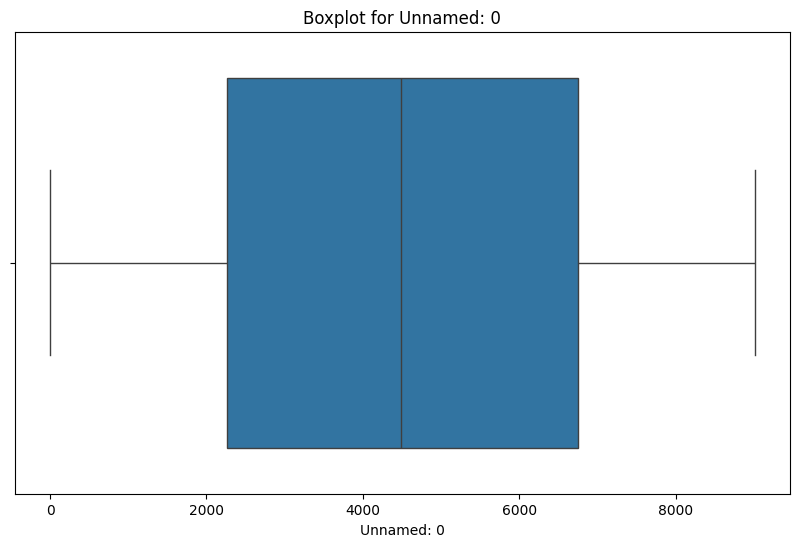

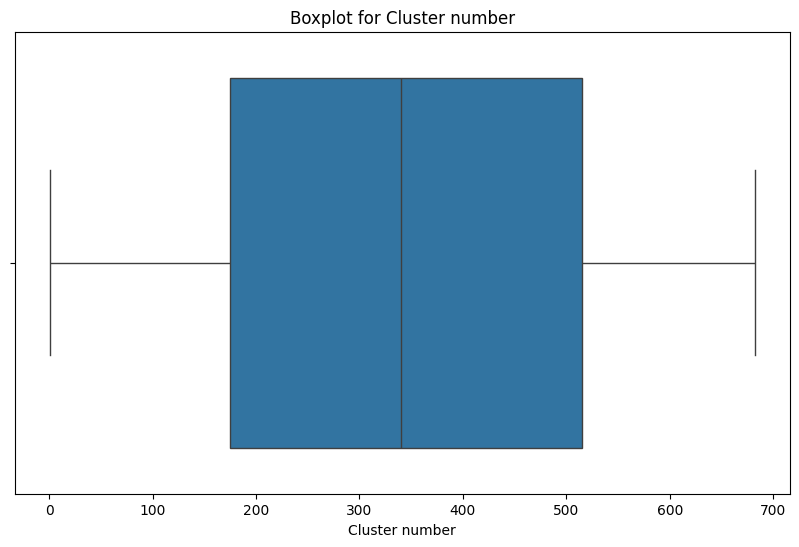

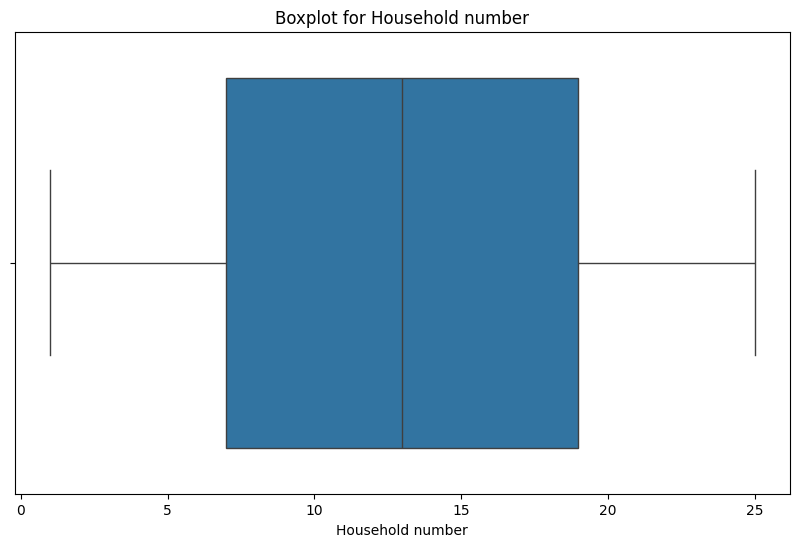

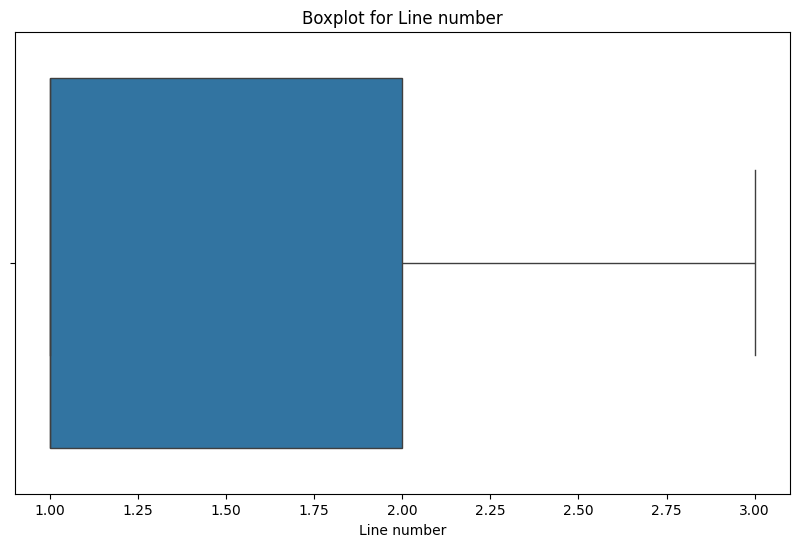

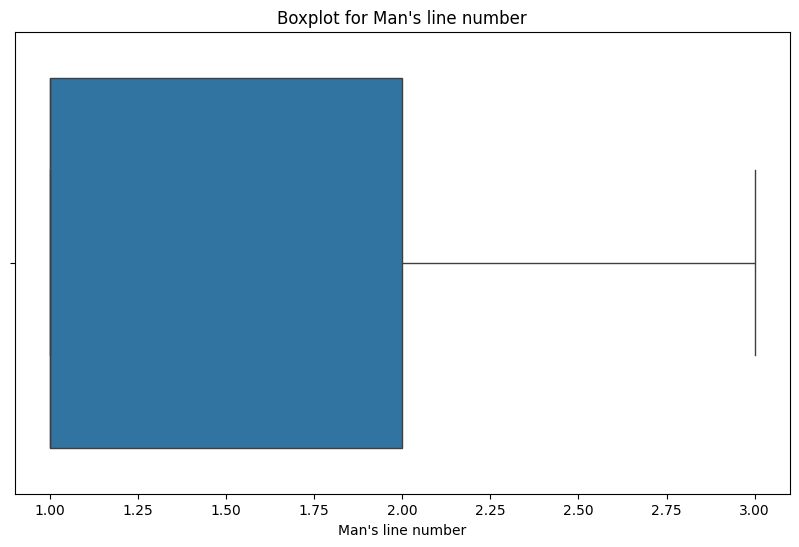

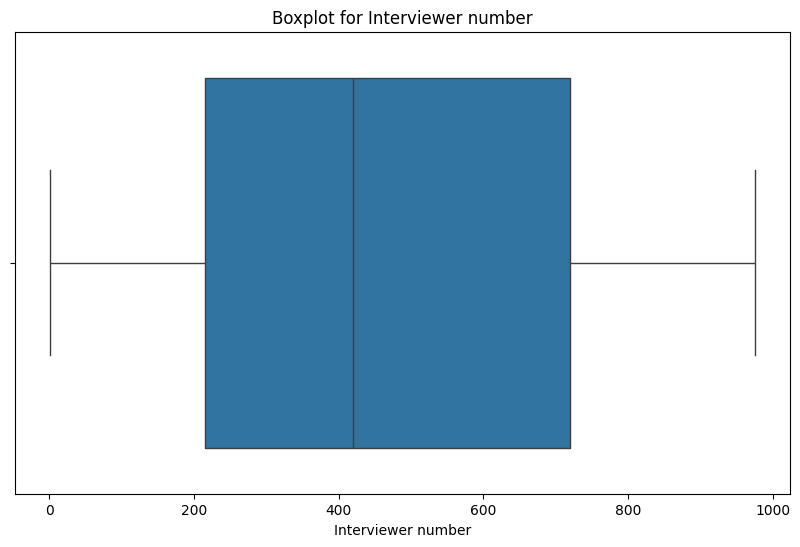

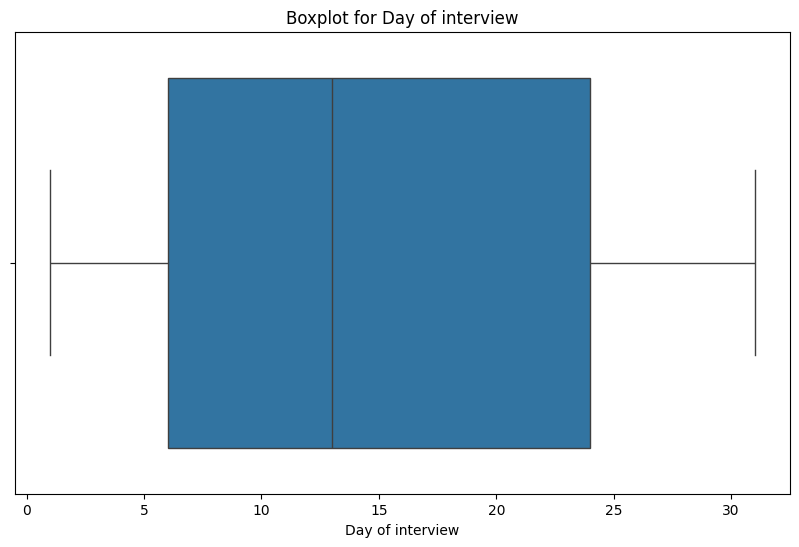

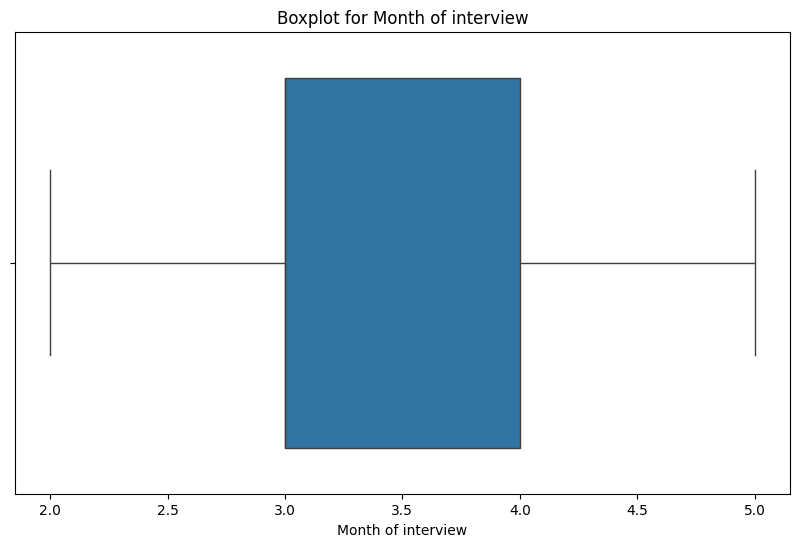

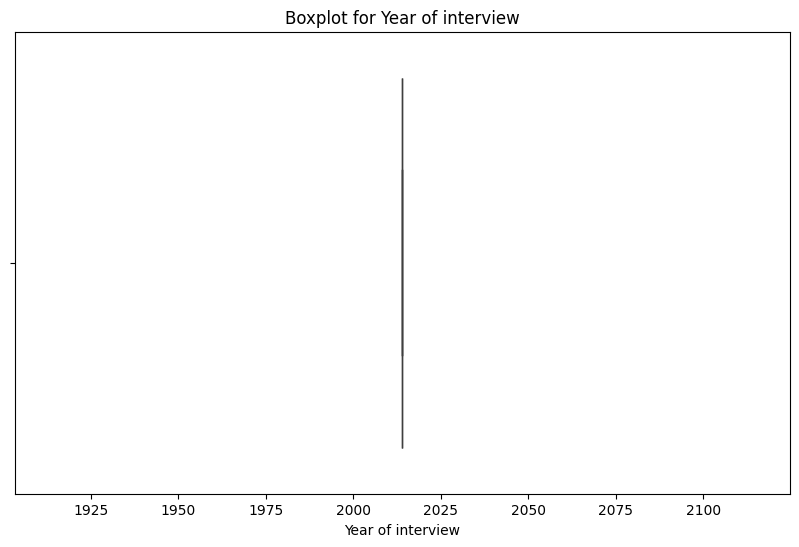

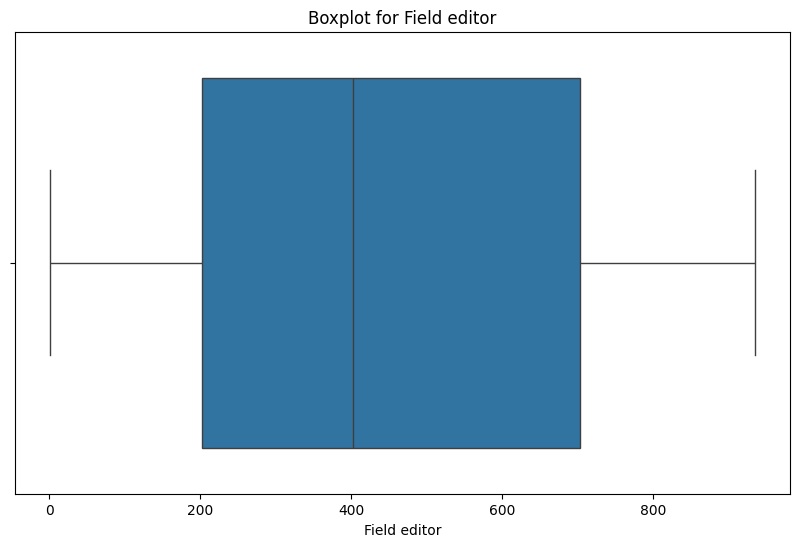

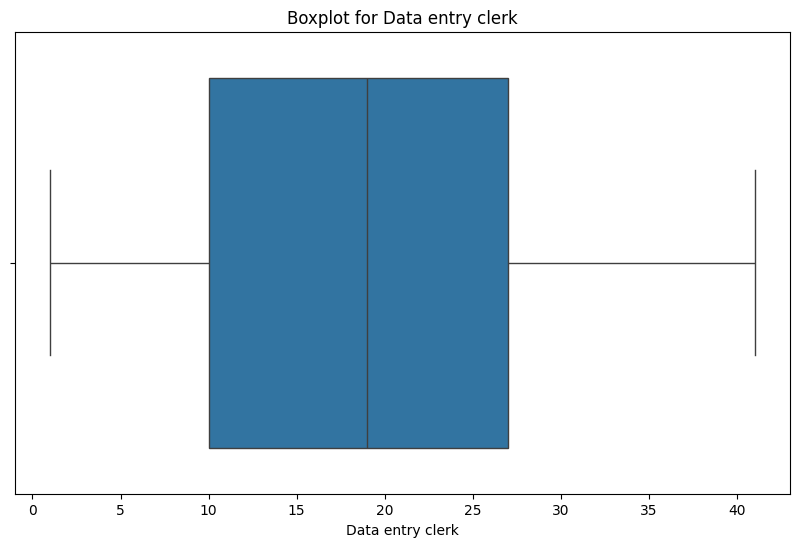

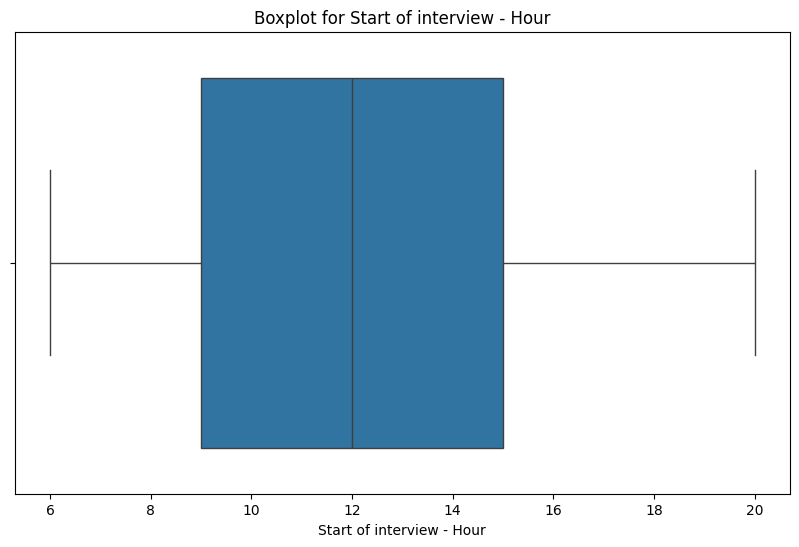

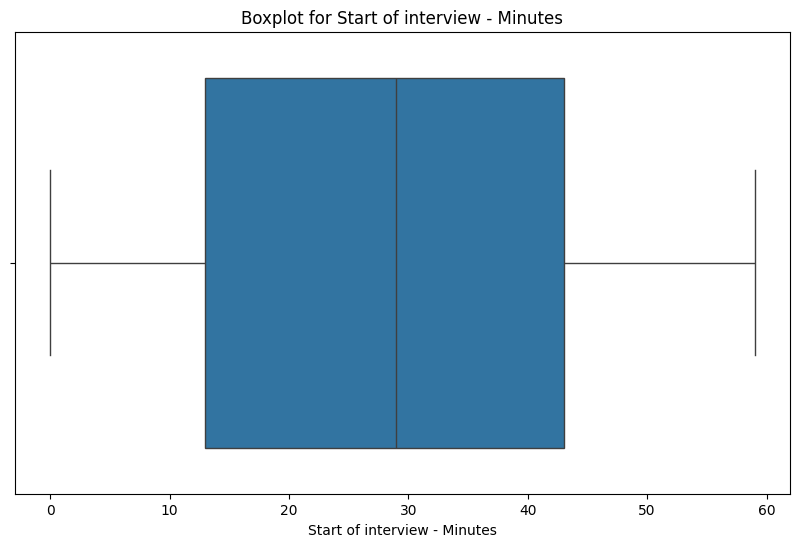

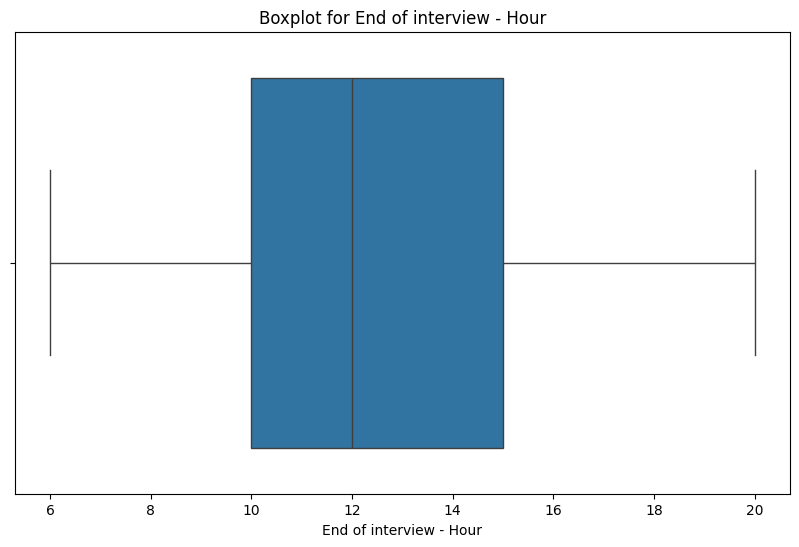

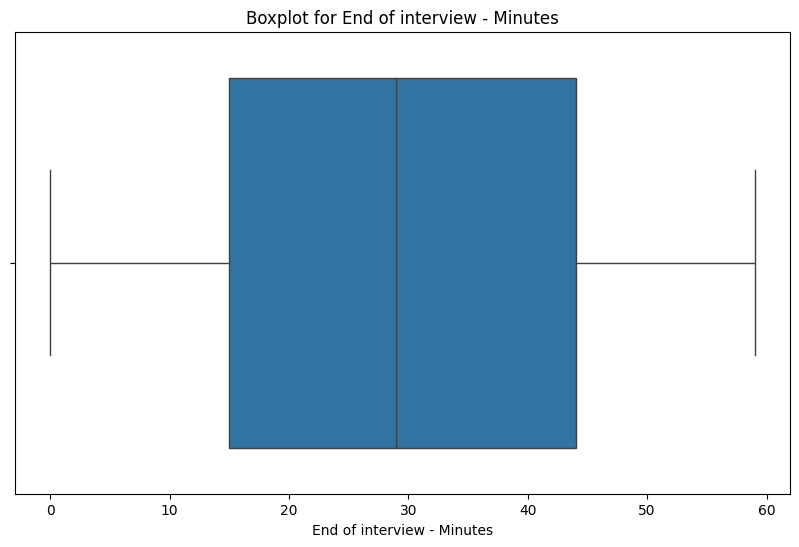

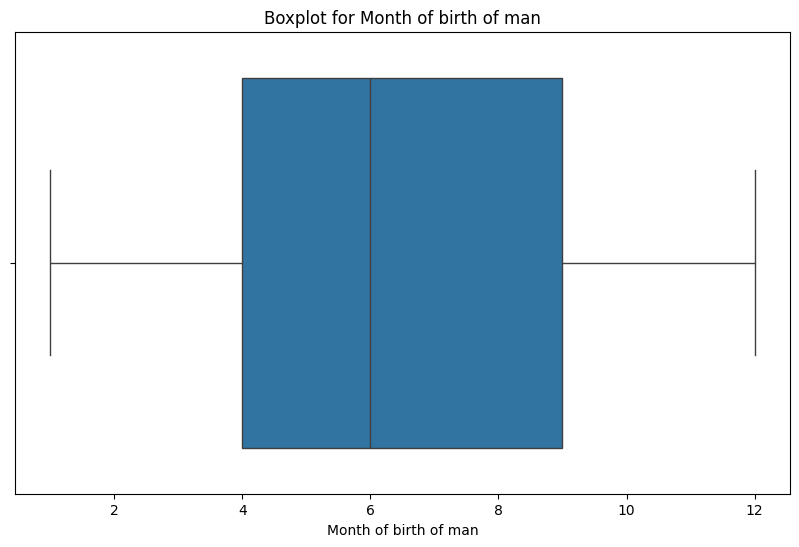

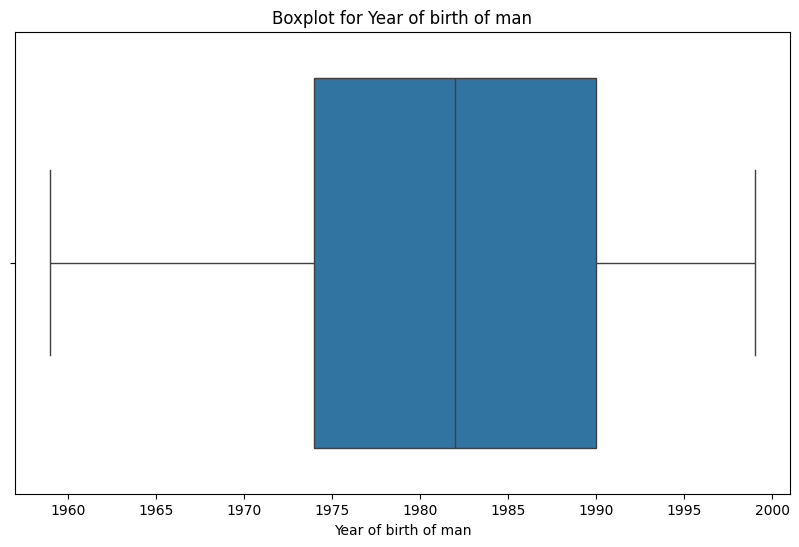

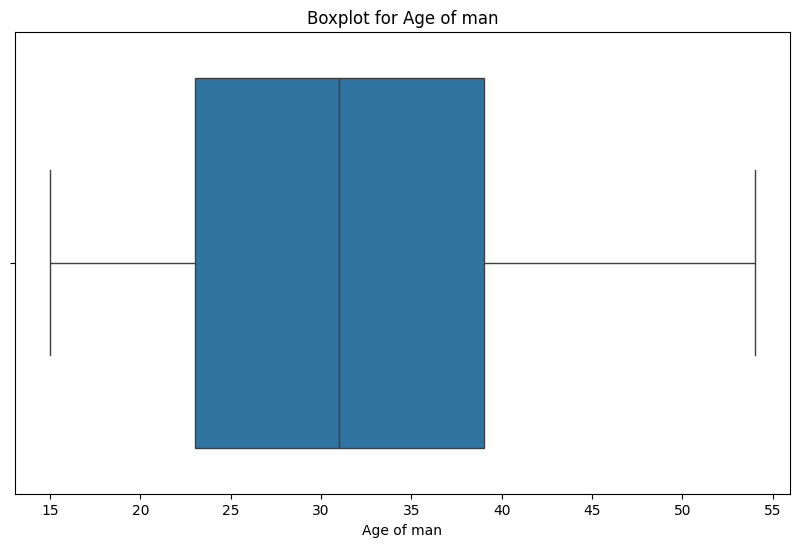

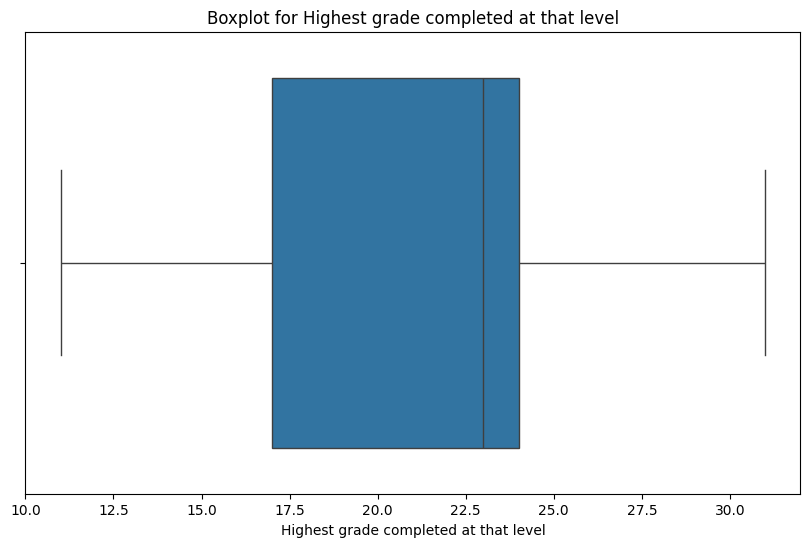

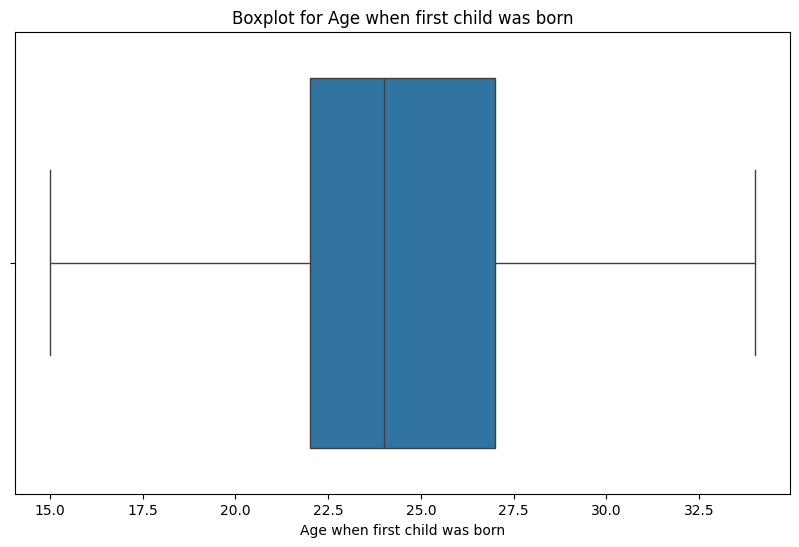

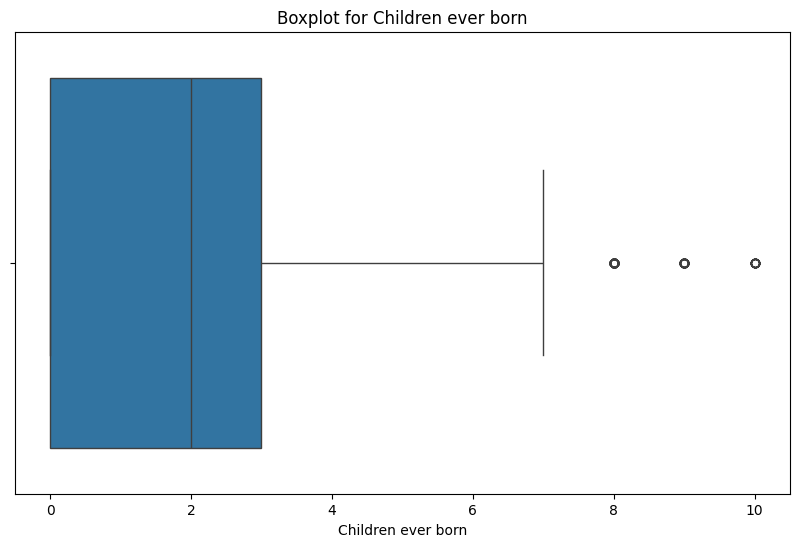

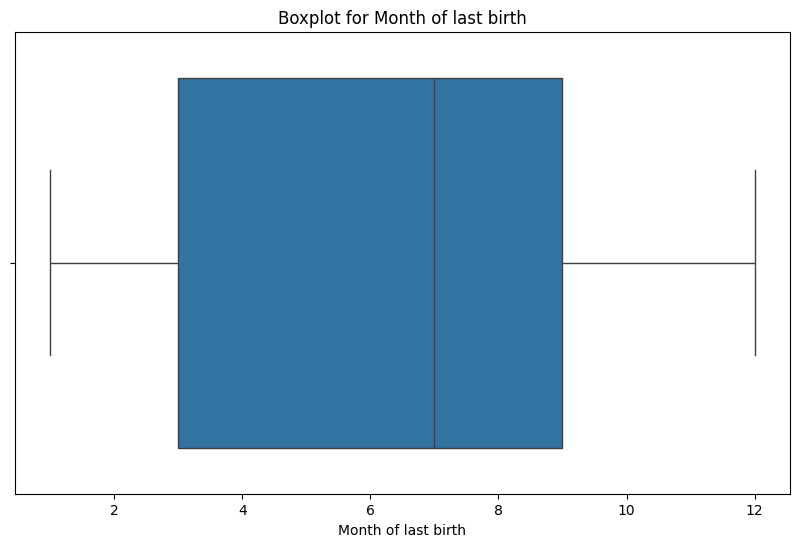

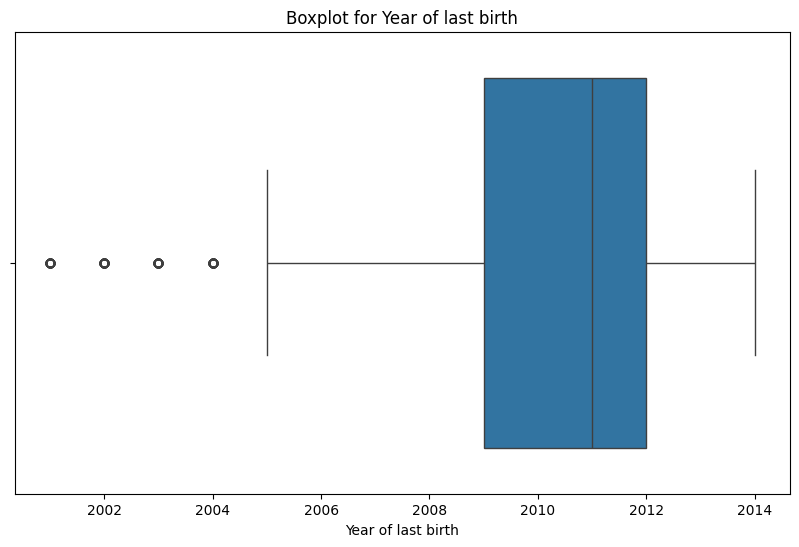

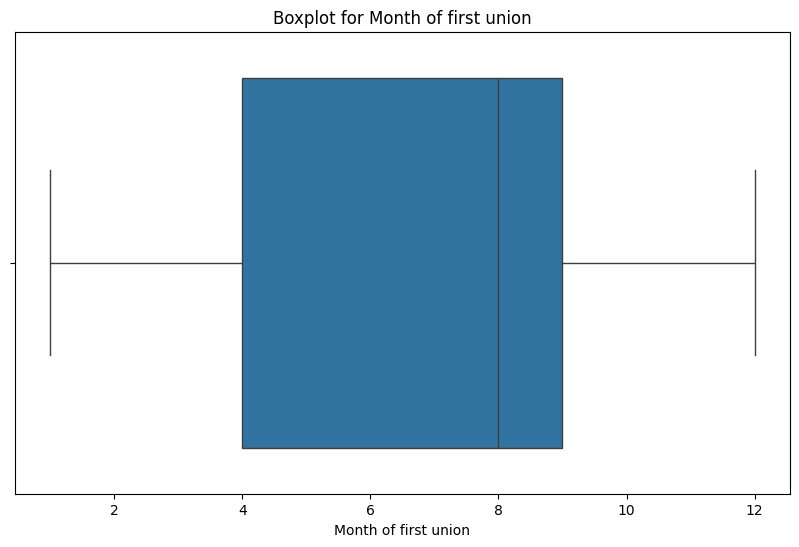

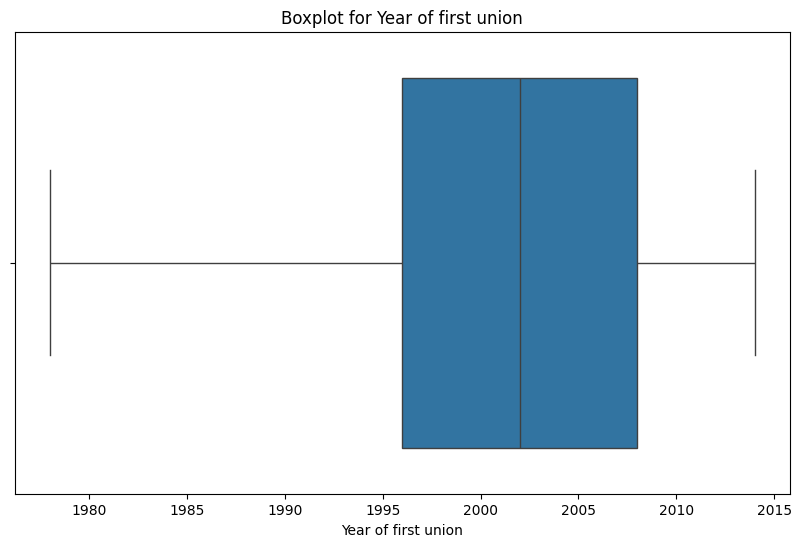

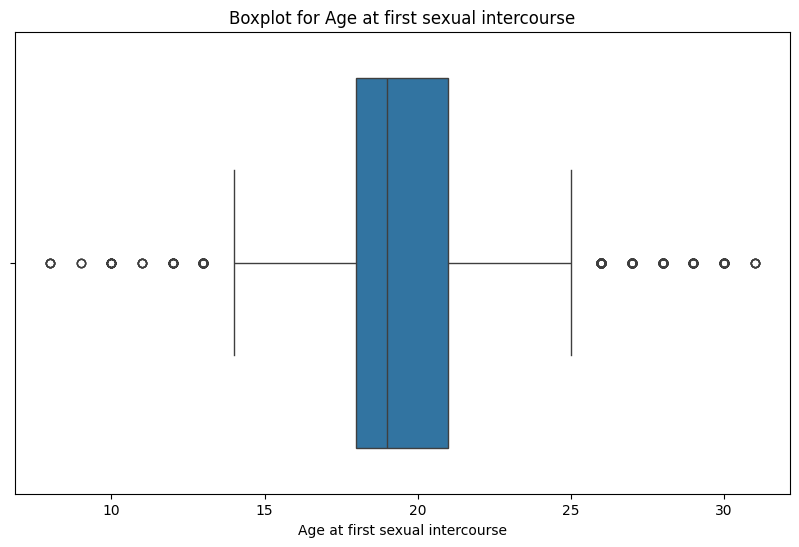

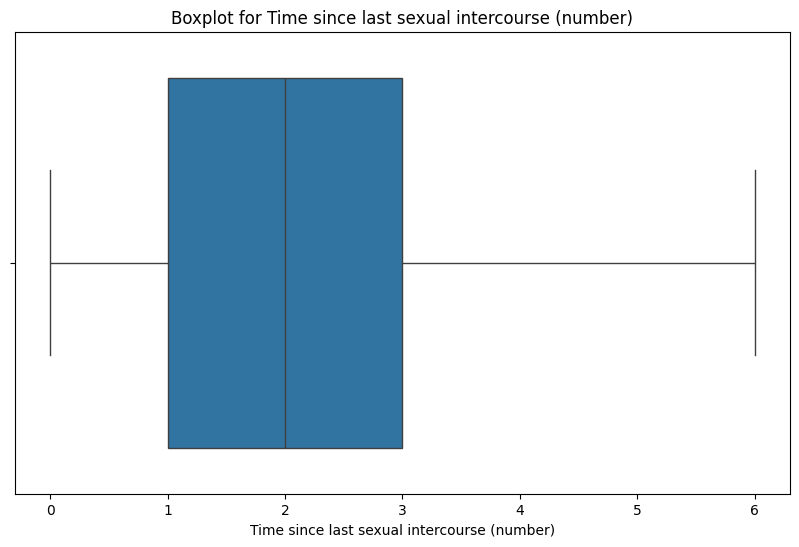

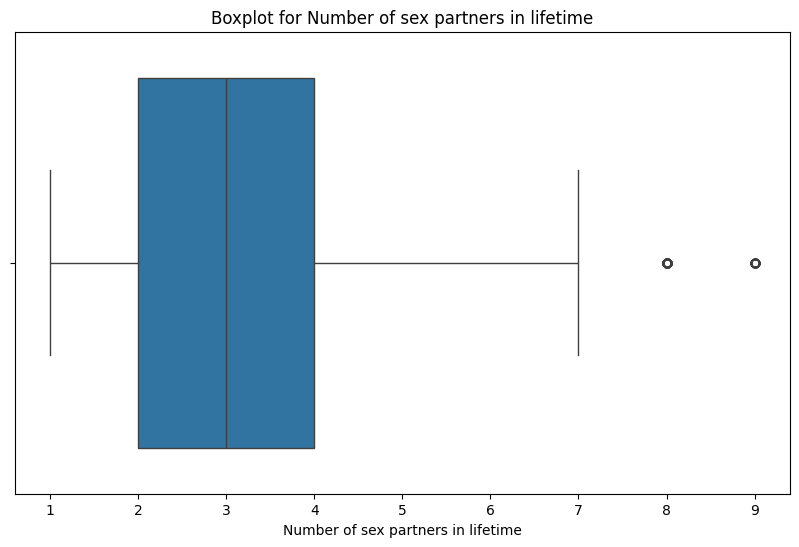

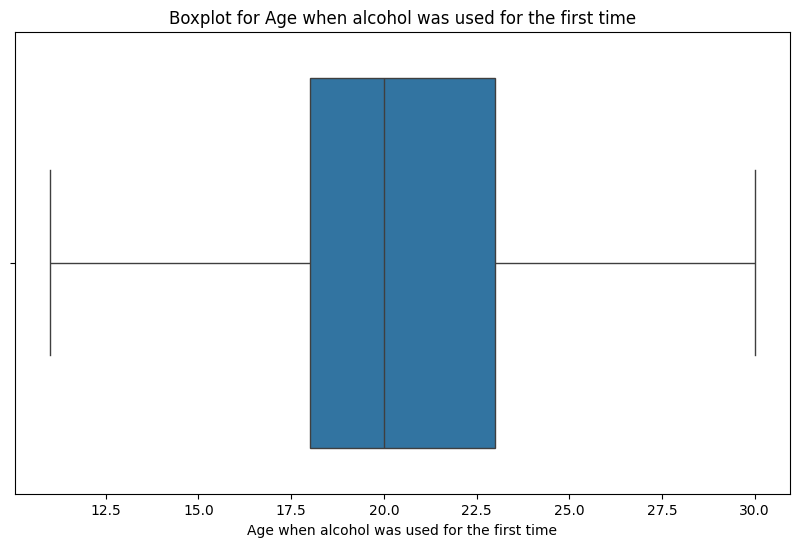

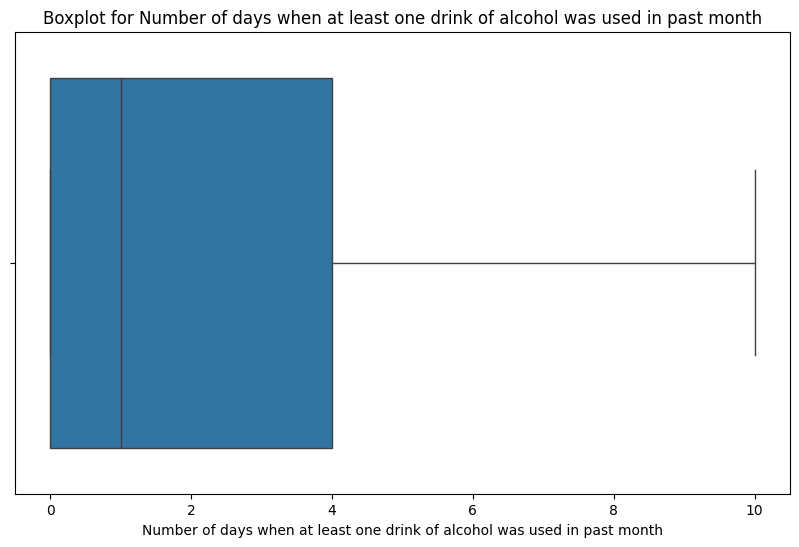

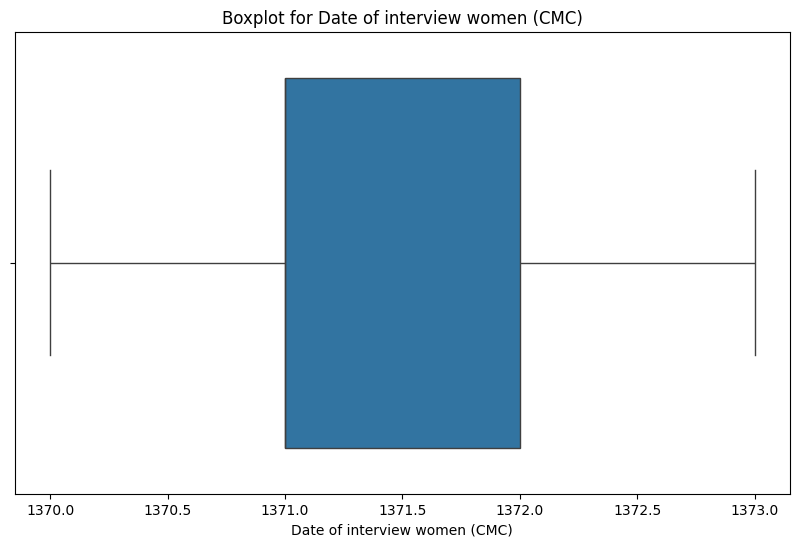

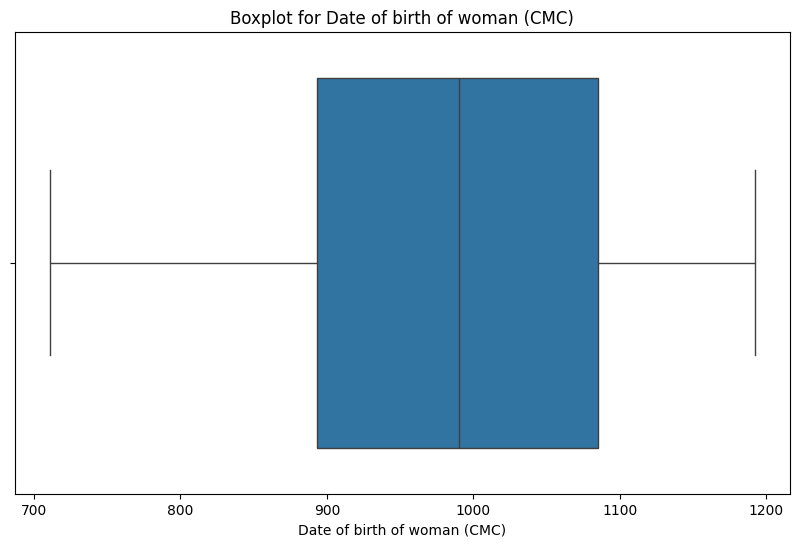

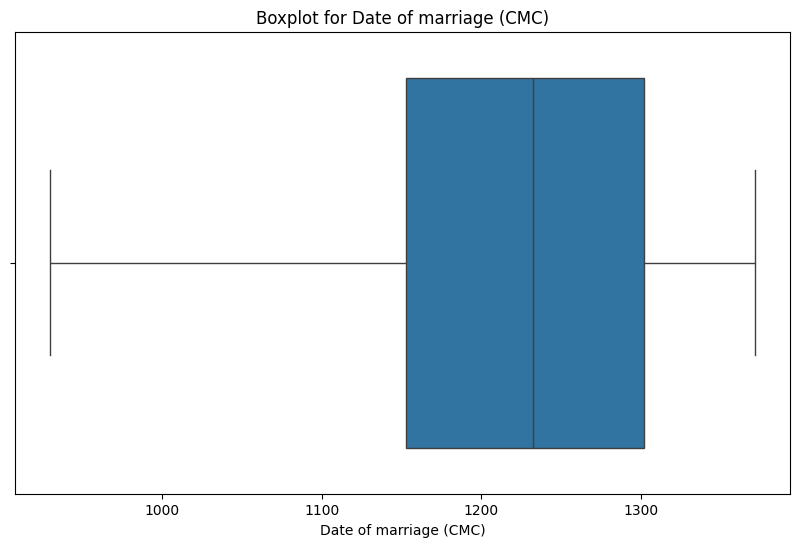

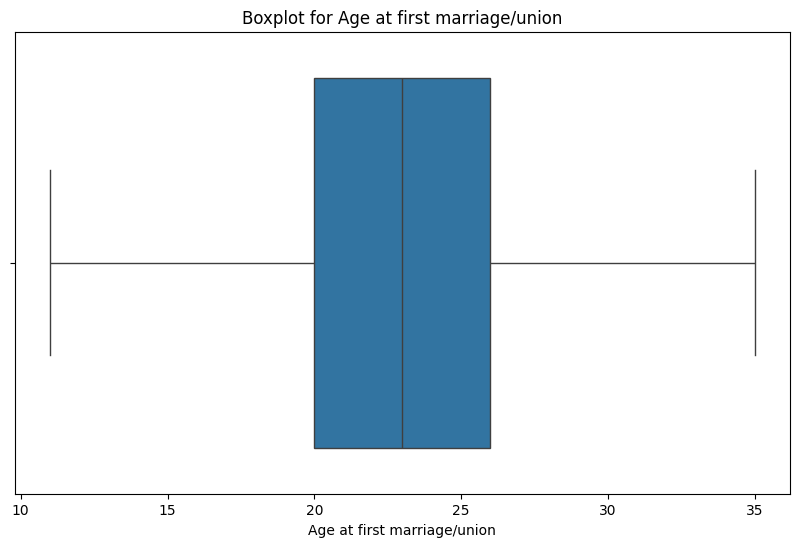

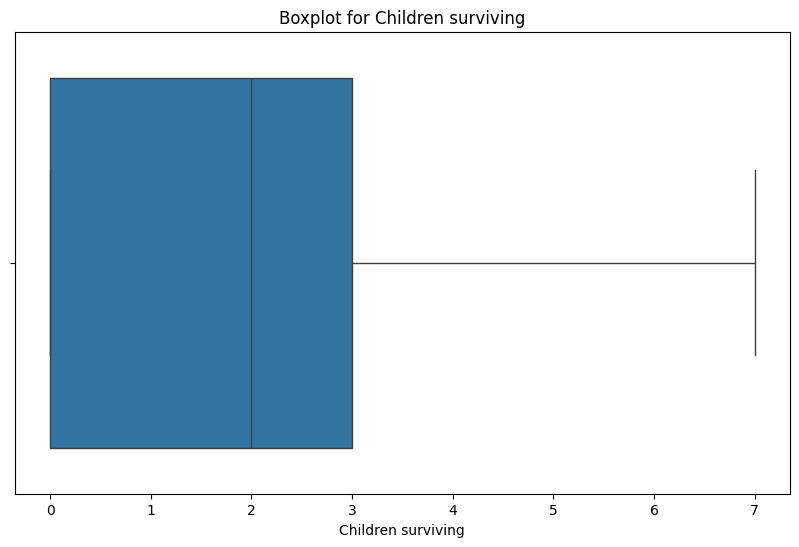

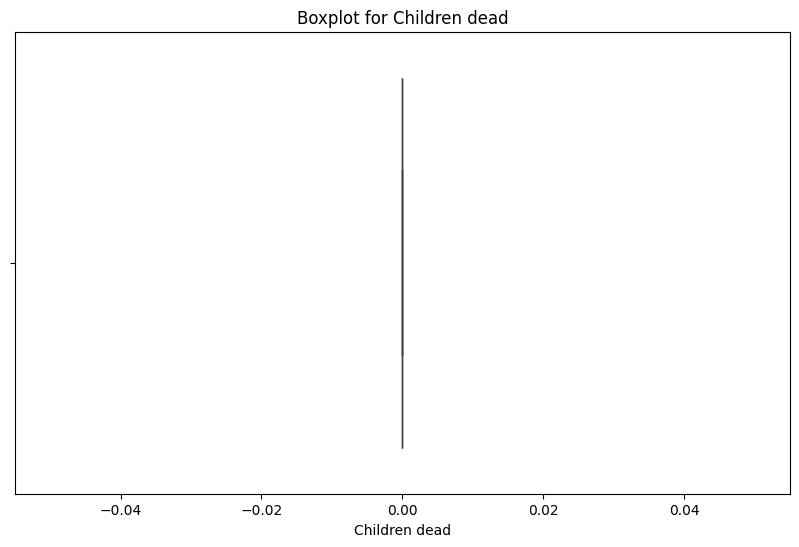

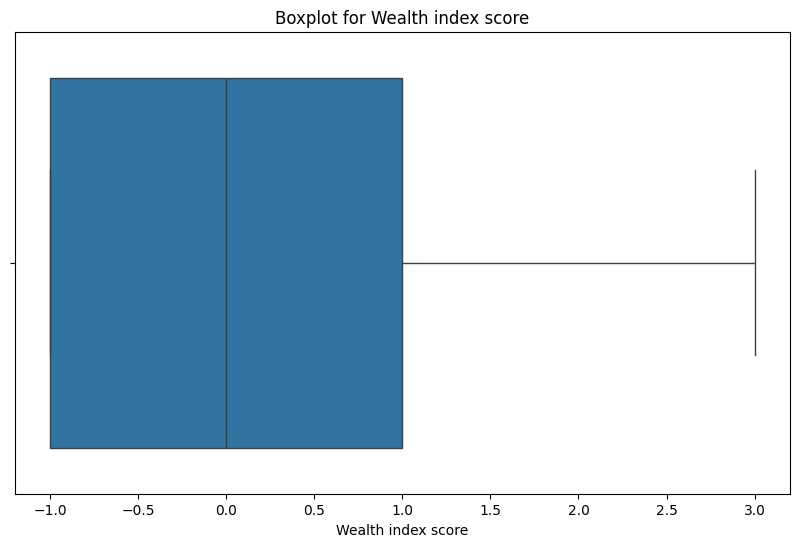

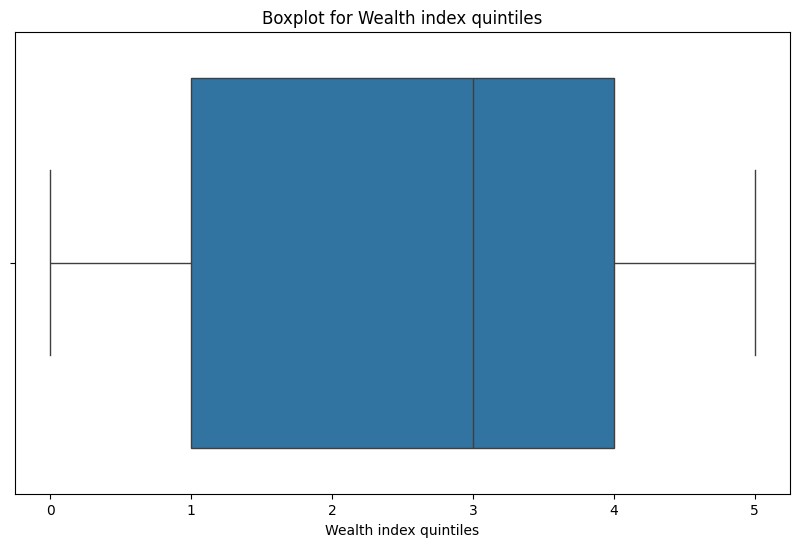

In [126]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_outliers_removed[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [127]:
# Gabungkan kembali dataset yang sudah diproses outlier dengan kolom non-numerik
df_final = pd.concat([
    df_outliers_removed, 
    dataset_cleaned_int[non_numerical_cols]
], axis=1)

# Verifikasi
print("Kolom numerik yang diproses:", list(df_outliers_removed.columns))
print("Kolom non-numerik yang digabungkan:", non_numerical_cols)
print("\nUkuran dataset awal:", dataset_cleaned_int.shape)
print("Ukuran dataset akhir:", df_final.shape)

Kolom numerik yang diproses: ['Unnamed: 0', 'Cluster number', 'Household number', 'Line number', "Man's line number", 'Interviewer number', 'Day of interview', 'Month of interview', 'Year of interview', "Result of man's interview", 'Field editor', 'Data entry clerk', 'Start of interview - Hour', 'Start of interview - Minutes', 'End of interview - Hour', 'End of interview - Minutes', 'Month of birth of man', 'Year of birth of man', 'Age of man', 'Ever attended school', 'Highest level of school attended', 'Highest grade completed at that level', 'Frequency of reading newspaper or magazine', 'Frequency of listening to the radio', 'Frequency of watching TV', 'Ever used a computer', 'Ever used internet', 'Ever used a mobile or non-mobile phone', 'Mobile or non-mobile phone usage in the last 12 months', 'Frequency of mobile or non-mobile usage in the past month', 'Ever fathered any children with any women', 'Age when first child was born', 'Any sons or daughters living with you', 'Any sons o

In [128]:
print(df_final[numerical_cols].isnull().sum())

Unnamed: 0                                                                     0
Cluster number                                                                 0
Household number                                                               0
Line number                                                                    0
Man's line number                                                              0
Interviewer number                                                             0
Day of interview                                                               0
Month of interview                                                             0
Year of interview                                                              0
Field editor                                                                   0
Data entry clerk                                                               0
Start of interview - Hour                                                    817
Start of interview - Minutes

In [129]:
numerical_cols = df_final.select_dtypes(include=['int64', 'float64']).columns

imputer = KNNImputer(n_neighbors=3)

df_final[numerical_cols] = imputer.fit_transform(df_final[numerical_cols])

In [130]:
# Cek missing values setelah imputasi
print("Missing values sebelum imputasi:")
print(df_final[numerical_cols].isnull().sum())

# print("\nMissing values setelah imputasi:")
# print(df_imputed_final.isnull().sum())

Missing values sebelum imputasi:
Unnamed: 0                                                                  0
Cluster number                                                              0
Household number                                                            0
Line number                                                                 0
Man's line number                                                           0
Interviewer number                                                          0
Day of interview                                                            0
Month of interview                                                          0
Year of interview                                                           0
Field editor                                                                0
Data entry clerk                                                            0
Start of interview - Hour                                                   0
Start of interview - Minutes   

In [131]:
# Step 5: Convert float columns to integers with rounding
df_final_imputer = df_final.copy()
float_cols = df_final_imputer.select_dtypes(include='float').columns
df_final_imputer[float_cols] = df_final_imputer[float_cols].apply(lambda x: x.round(0).astype('Int64'))

In [132]:
df_final_imputer.dtypes

Unnamed: 0               Int64
Cluster number           Int64
Household number         Int64
Line number              Int64
Man's line number        Int64
                         ...  
Ever drunk alcohol      object
Area                    object
Region                  object
Age                     object
Marital/Union status    object
Length: 150, dtype: object

In [133]:
df_final_imputer.isnull().sum()

Unnamed: 0                0
Cluster number            0
Household number          0
Line number               0
Man's line number         0
                       ... 
Ever drunk alcohol      817
Area                      0
Region                    0
Age                     817
Marital/Union status    817
Length: 150, dtype: int64

In [138]:
for column in df_final_imputer.select_dtypes(exclude=['number']).columns:
    mode_value = df_final_imputer[column].mode().iloc[0]  # Cari mode kolom
    df_final_imputer[column] = df_final_imputer[column].fillna(mode_value)  # Isi semua NaN dengan mode

In [139]:
df_final_imputer.isnull().sum()

Unnamed: 0              0
Cluster number          0
Household number        0
Line number             0
Man's line number       0
                       ..
Ever drunk alcohol      0
Area                    0
Region                  0
Age                     0
Marital/Union status    0
Length: 150, dtype: int64

In [163]:
df_final_imputer.to_excel("data_final.xlsx")

In [157]:
data = pd.read_excel("data_final.xlsx")

In [141]:
df_final_imputer.shape

(6920, 150)

In [142]:
object_cols = df_final_imputer.select_dtypes(exclude=['number']).columns

In [150]:
df_final_imputer['Cluster number']

0         1
1         1
2         2
5         2
6         2
       ... 
9001    682
9002    682
9005    682
9006    682
9007    682
Name: Cluster number, Length: 6920, dtype: Int64

In [158]:
grouped_data = data.groupby("Household number").agg(
    {
        col: (lambda x: ' | '.join(x.dropna().unique()) if x.dtype == 'O' else x.mean())
        for col in data.columns
        if col != "Household number"
    }
).reset_index()

print(grouped_data)

    Household number  Unnamed: 0.1   Unnamed: 0  Cluster number  Line number  \
0                  1   4628.792793  4629.792793      356.252252     1.234234   
1                  2   4571.058219  4572.058219      351.777397     1.332192   
2                  3   4240.470405  4241.470405      326.651090     1.355140   
3                  4   4810.675325  4811.675325      369.835498     1.316017   
4                  5   4577.326667  4578.326667      352.176667     1.360000   
5                  6   4323.764331  4324.764331      332.649682     1.385350   
6                  7   4572.152893  4573.152893      351.727273     1.264463   
7                  8   4816.436482  4817.436482      370.270358     1.342020   
8                  9   4150.971246  4151.971246      319.469649     1.322684   
9                 10   4677.973568  4678.973568      359.669604     1.370044   
10                11   4642.981250  4643.981250      356.946875     1.396875   
11                12   4324.961415  4325

In [159]:
grouped_data = data.groupby("Household number").agg(
    {
        col: (lambda x: ' | '.join(x.dropna().unique()) if x.dtype == 'O' else x.median())
        for col in data.columns
        if col != "Household number"
    }
).reset_index()

print(grouped_data)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keep

    Household number  Unnamed: 0.1  Unnamed: 0  Cluster number  Line number  \
0                  1        4542.0      4543.0           346.0          1.0   
1                  2        4804.0      4805.0           364.0          1.0   
2                  3        4167.0      4168.0           318.0          1.0   
3                  4        4980.0      4981.0           378.0          1.0   
4                  5        4596.0      4597.0           350.5          1.0   
5                  6        4249.5      4250.5           323.5          1.0   
6                  7        4460.5      4461.5           339.0          1.0   
7                  8        4989.0      4990.0           379.0          1.0   
8                  9        3933.0      3934.0           302.0          1.0   
9                 10        4658.0      4659.0           354.0          1.0   
10                11        4705.0      4706.0           357.5          1.0   
11                12        4300.0      4301.0      